In [1]:
import os.path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gp
from shapely import wkt
import contextily as cx

## Predictions

In [2]:
pred_path = '../data/predictions.csv'

In [3]:
predictions = pd.read_csv(pred_path)
predictions.shape

(155, 8)

In [4]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   agrimetrics_id            155 non-null    object 
 1   Prediction Date           155 non-null    object 
 2   BARLEY Probability        155 non-null    float64
 3   WHEAT Probability         155 non-null    float64
 4   UNKNOWN_CROP Probability  155 non-null    float64
 5   OILSEED Probability       155 non-null    float64
 6   GRASS Probability         155 non-null    float64
 7   field_name                155 non-null    object 
dtypes: float64(5), object(3)
memory usage: 9.8+ KB


In [5]:
predictions.head()

agrimetrics_id  \
0  https://data.agrimetrics.co.uk/fields/eKukN2a1...   
1  https://data.agrimetrics.co.uk/fields/CplvWNJD...   
2  https://data.agrimetrics.co.uk/fields/MCNJlWvN...   
3  https://data.agrimetrics.co.uk/fields/UlYuKx20...   
4  https://data.agrimetrics.co.uk/fields/fD4t_pAn...   

            Prediction Date  BARLEY Probability  WHEAT Probability  \
0  2018-06-15T00:00:00.000Z            0.900810           0.040486   
1  2018-06-15T00:00:00.000Z            0.086149           0.791429   
2  2018-06-15T00:00:00.000Z            0.081478           0.073918   
3  2018-06-15T00:00:00.000Z            0.085584           0.792133   
4  2018-06-15T00:00:00.000Z            0.900810           0.040486   

   UNKNOWN_CROP Probability  OILSEED Probability  GRASS Probability  \
0                  0.033592             0.013500           0.011613   
1                  0.060712             0.011207           0.050503   
2                  0.661083             0.034868           0.148652   
3                  0.061435             0.011385           0.049464   
4                  0.033592             0.013500           0.011613   

      field_name  
0  Blacksmiths-1  
1   Near_Field-2  
2       Intake-3  
3       Intake-3  
4  Brook_Field-4

In [6]:
predictions.field_name.value_counts()

Intake-3              10
Grain_Store-5         10
13_Acre-7             10
Rifle_Range-24        10
Far_Field-13          10
Wood_Field-17         10
Blacksmiths-1          5
Roy_Jordans-18         5
Daniels-26             5
12_Acre-25             5
15_Acre_MW-23          5
20_Acre-22             5
Glebe-21               5
17_Acre-20             5
Golf_course-19         5
Leg_Field-14           5
Bungalow_Field-16      5
Near_Field-2           5
Barn_Field-12          5
Barn_Field-11          5
9_Acre_Parsonage-9     5
Slip-8                 5
Drain_Field-6          5
Brook_Field-4          5
Over_MW-27             5
Name: field_name, dtype: int64

In [7]:
predictions[predictions.field_name == 'Intake-3']

agrimetrics_id  \
2    https://data.agrimetrics.co.uk/fields/MCNJlWvN...   
3    https://data.agrimetrics.co.uk/fields/UlYuKx20...   
33   https://data.agrimetrics.co.uk/fields/MCNJlWvN...   
34   https://data.agrimetrics.co.uk/fields/UlYuKx20...   
64   https://data.agrimetrics.co.uk/fields/MCNJlWvN...   
65   https://data.agrimetrics.co.uk/fields/UlYuKx20...   
95   https://data.agrimetrics.co.uk/fields/MCNJlWvN...   
96   https://data.agrimetrics.co.uk/fields/UlYuKx20...   
126  https://data.agrimetrics.co.uk/fields/MCNJlWvN...   
127  https://data.agrimetrics.co.uk/fields/UlYuKx20...   

              Prediction Date  BARLEY Probability  WHEAT Probability  \
2    2018-06-15T00:00:00.000Z            0.081478           0.073918   
3    2018-06-15T00:00:00.000Z            0.085584           0.792133   
33   2019-06-15T00:00:00.000Z            0.078378           0.070874   
34   2019-06-15T00:00:00.000Z            0.900810           0.040486   
64   2020-06-15T00:00:00.000Z            0.081550           0.074042   
65   2020-06-15T00:00:00.000Z            0.081478           0.073918   
95   2021-06-15T00:00:00.000Z            0.068264           0.060365   
96   2021-06-15T00:00:00.000Z            0.069925           0.063779   
126  2022-06-15T00:00:00.000Z            0.076780           0.069593   
127  2022-06-15T00:00:00.000Z            0.059697           0.051484   

     UNKNOWN_CROP Probability  OILSEED Probability  GRASS Probability  \
2                    0.661083             0.034868           0.148652   
3                    0.061435             0.011385           0.049464   
33                   0.625884             0.033474           0.191390   
34                   0.033592             0.013500           0.011613   
64                   0.661877             0.034704           0.147827   
65                   0.661083             0.034868           0.148652   
95                   0.483815             0.027575           0.359982   
96                   0.498299             0.028315           0.339682   
126                  0.595645             0.031874           0.226108   
127                  0.368063             0.022519           0.498237   

    field_name  
2     Intake-3  
3     Intake-3  
33    Intake-3  
34    Intake-3  
64    Intake-3  
65    Intake-3  
95    Intake-3  
96    Intake-3  
126   Intake-3  
127   Intake-3

In [8]:
predictions['Prediction Date'] = pd.to_datetime(predictions['Prediction Date'])
predictions['Prediction Date'].isna().sum()

0

In [9]:
intake = predictions[predictions.field_name == 'Intake-3']
intake = pd.melt(intake, id_vars=['Prediction Date', 'agrimetrics_id'], value_vars=intake.columns[intake.columns.str.contains('Probability')])
intake['agrimetrics_id_short'] = intake.agrimetrics_id.apply(os.path.basename)
intake.head()

Prediction Date  \
0 2018-06-15 00:00:00+00:00   
1 2018-06-15 00:00:00+00:00   
2 2019-06-15 00:00:00+00:00   
3 2019-06-15 00:00:00+00:00   
4 2020-06-15 00:00:00+00:00   

                                      agrimetrics_id            variable  \
0  https://data.agrimetrics.co.uk/fields/MCNJlWvN...  BARLEY Probability   
1  https://data.agrimetrics.co.uk/fields/UlYuKx20...  BARLEY Probability   
2  https://data.agrimetrics.co.uk/fields/MCNJlWvN...  BARLEY Probability   
3  https://data.agrimetrics.co.uk/fields/UlYuKx20...  BARLEY Probability   
4  https://data.agrimetrics.co.uk/fields/MCNJlWvN...  BARLEY Probability   

      value    agrimetrics_id_short  
0  0.081478  MCNJlWvN1rA8U03lZuHcyA  
1  0.085584  UlYuKx209GPBj5LuJn-qMQ  
2  0.078378  MCNJlWvN1rA8U03lZuHcyA  
3  0.900810  UlYuKx209GPBj5LuJn-qMQ  
4  0.081550  MCNJlWvN1rA8U03lZuHcyA

In [10]:
intake.agrimetrics_id_short.value_counts()

MCNJlWvN1rA8U03lZuHcyA    25
UlYuKx209GPBj5LuJn-qMQ    25
Name: agrimetrics_id_short, dtype: int64

<AxesSubplot:xlabel='Prediction Date', ylabel='value'>

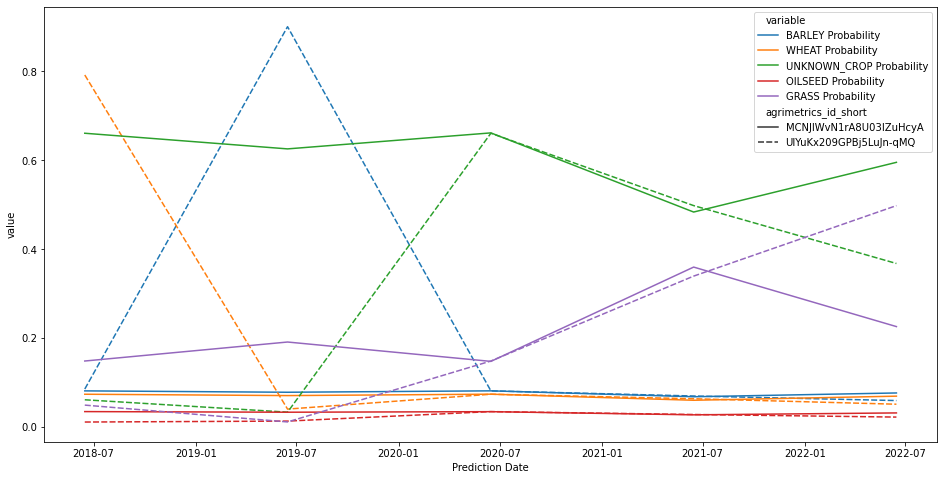

In [11]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Prediction Date', y='value', hue='variable', style='agrimetrics_id_short', data=intake)

What does this tell us for prediction confidence?
The probabilities for id 'MCN...' are only high for 'UKNOWN'. This is the smaller parcel of land in the northwest corner.
Consequently we may suspect this actually is left uncultivated and certainly seems to be where we've seen activity such as possible piling of material or harvested crops in aerial imagery.
The parcel with id 'UlY...' was barley, then wheat, and then '???' with a rise in probability of grass. Perhaps it was left fallow after the wheat?

Either way, we have established that this one single field polygon, as identified by Agreed, is identified as two separate parcels by Agrimetrics, with different crop profiles.
Therefore we cannot compare to the 'actual' crop for the Agreed field polygon.
We might justifiably ascribe the actual crop to the larger parcel ('MCN...'), but I'm not flipping going through this groundtruthing detecting work for the other duplicated fields.
Thus we will drop those duplicated fields from the analysis for the time being.

In [12]:
predictions.field_name = predictions.field_name.str.rstrip('-1234567890')
field_name_keep = predictions.field_name.value_counts()
field_name_keep = field_name_keep[field_name_keep < 10].index.tolist()
field_name_keep

['Blacksmiths',
 'Golf_course',
 'Daniels',
 '12_Acre',
 '15_Acre_MW',
 '20_Acre',
 'Glebe',
 '17_Acre',
 'Bungalow_Field',
 'Roy_Jordans',
 'Near_Field',
 'Leg_Field',
 '9_Acre_Parsonage',
 'Slip',
 'Drain_Field',
 'Brook_Field',
 'Over_MW']

In [13]:
predictions = predictions[predictions.field_name.isin(field_name_keep)]
predictions

agrimetrics_id  \
0    https://data.agrimetrics.co.uk/fields/eKukN2a1...   
1    https://data.agrimetrics.co.uk/fields/CplvWNJD...   
4    https://data.agrimetrics.co.uk/fields/fD4t_pAn...   
7    https://data.agrimetrics.co.uk/fields/W7ErfmVG...   
10   https://data.agrimetrics.co.uk/fields/7C9vsIts...   
..                                                 ...   
148  https://data.agrimetrics.co.uk/fields/V0zucGn9...   
149  https://data.agrimetrics.co.uk/fields/tEbrWzbM...   
152  https://data.agrimetrics.co.uk/fields/hiD8OVgR...   
153  https://data.agrimetrics.co.uk/fields/97H1TeAS...   
154  https://data.agrimetrics.co.uk/fields/6u4dKOEA...   

              Prediction Date  BARLEY Probability  WHEAT Probability  \
0   2018-06-15 00:00:00+00:00            0.900810           0.040486   
1   2018-06-15 00:00:00+00:00            0.086149           0.791429   
4   2018-06-15 00:00:00+00:00            0.900810           0.040486   
7   2018-06-15 00:00:00+00:00            0.900810           0.040486   
10  2018-06-15 00:00:00+00:00            0.067203           0.064337   
..                        ...                 ...                ...   
148 2022-06-15 00:00:00+00:00            0.056278           0.051171   
149 2022-06-15 00:00:00+00:00            0.069517           0.063111   
152 2022-06-15 00:00:00+00:00            0.058575           0.049397   
153 2022-06-15 00:00:00+00:00            0.047533           0.040938   
154 2022-06-15 00:00:00+00:00            0.060269           0.053186   

     UNKNOWN_CROP Probability  OILSEED Probability  GRASS Probability  \
0                    0.033592             0.013500           0.011613   
1                    0.060712             0.011207           0.050503   
4                    0.033592             0.013500           0.011613   
7                    0.033592             0.013500           0.011613   
10                   0.505652             0.028382           0.334426   
..                        ...                  ...                ...   
148                  0.418315             0.023795           0.450441   
149                  0.547029             0.029425           0.290918   
152                  0.320126             0.021161           0.550741   
153                  0.265049             0.017640           0.628840   
154                  0.408571             0.024260           0.453715   

      field_name  
0    Blacksmiths  
1     Near_Field  
4    Brook_Field  
7    Drain_Field  
10          Slip  
..           ...  
148      20_Acre  
149   15_Acre_MW  
152      12_Acre  
153      Daniels  
154      Over_MW  

[85 rows x 8 columns]

In [14]:
predicted = pd.melt(predictions,
                    id_vars=['Prediction Date', 'agrimetrics_id', 'field_name'],
                    value_vars=predictions.columns[predictions.columns.str.contains('Probability')],
                    var_name='crop',
                    value_name='probability',
                   )
predicted['agrimetrics_id_short'] = predicted.agrimetrics_id.apply(os.path.basename)
predicted.crop = predicted.crop.str.replace(' Probability', '')
predicted.head()

Prediction Date  \
0 2018-06-15 00:00:00+00:00   
1 2018-06-15 00:00:00+00:00   
2 2018-06-15 00:00:00+00:00   
3 2018-06-15 00:00:00+00:00   
4 2018-06-15 00:00:00+00:00   

                                      agrimetrics_id   field_name    crop  \
0  https://data.agrimetrics.co.uk/fields/eKukN2a1...  Blacksmiths  BARLEY   
1  https://data.agrimetrics.co.uk/fields/CplvWNJD...   Near_Field  BARLEY   
2  https://data.agrimetrics.co.uk/fields/fD4t_pAn...  Brook_Field  BARLEY   
3  https://data.agrimetrics.co.uk/fields/W7ErfmVG...  Drain_Field  BARLEY   
4  https://data.agrimetrics.co.uk/fields/7C9vsIts...         Slip  BARLEY   

   probability    agrimetrics_id_short  
0     0.900810  eKukN2a1D4Y2Awcyg4M-9Q  
1     0.086149  CplvWNJDVHfbDM6uivUc8w  
2     0.900810  fD4t_pAnMA2HxYrCH56dwg  
3     0.900810  W7ErfmVG3G8TvUpRxG_LnA  
4     0.067203  7C9vsItstYuV0d_4ayW2FQ

In [15]:
predicted.groupby('field_name')['agrimetrics_id_short'].value_counts()

field_name        agrimetrics_id_short  
12_Acre           hiD8OVgR8-v8Cx8A01DYyw    25
15_Acre_MW        tEbrWzbMZEjXGabzLZQpAQ    25
17_Acre           IL1Sdn_0WBgkik3MrSiJlQ    25
20_Acre           V0zucGn9iX7yM-RCilWCRA    25
9_Acre_Parsonage  Y1rWOcy4pY7VpQl9C1zyKQ    25
Blacksmiths       eKukN2a1D4Y2Awcyg4M-9Q    25
Brook_Field       fD4t_pAnMA2HxYrCH56dwg    25
Bungalow_Field    cdjkLFtCfJx3AAzdNolyfA    25
Daniels           97H1TeAS1AqLgSv1-ZKK2Q    25
Drain_Field       W7ErfmVG3G8TvUpRxG_LnA    25
Glebe             91zQs0DGbfoHWp01vMLQ-A    25
Golf_course       haHKkpd2ES5WjX4We68uVA    25
Leg_Field         uP76HWjwZzJTW-r7hxhm9A    25
Near_Field        CplvWNJDVHfbDM6uivUc8w    25
Over_MW           6u4dKOEAmVsIsP5UWojH1Q    25
Roy_Jordans       7xWnZWefQlkA1ZsaOgKCKw    25
Slip              7C9vsItstYuV0d_4ayW2FQ    25
Name: agrimetrics_id_short, dtype: int64

Checking we now have 1-1 mapping between field name and Agrimetric ID for reassurance.

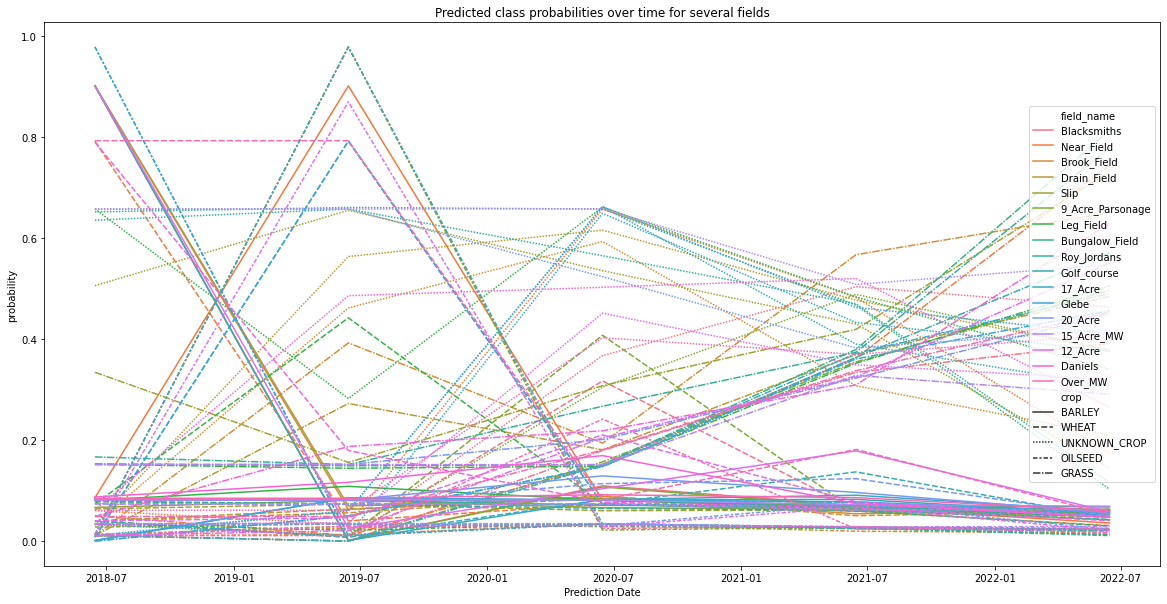

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Prediction Date', y='probability', hue='field_name', style='crop', markers=False, data=predicted, ax=ax)
ax.set_title('Predicted class probabilities over time for several fields')
ax.legend(loc='right');
plt.savefig('../plots/class_prob_over_time.png', facecolor='white')

Although the plot is very busy, which is usually a warning sign, some observations can be pulled out from the above:
* There were some strong convictions in 2018 and 2019 for specific crop types (oilseed, barley, and wheat)
* The high class probabilities of 2018 remained remarkably constant into 2019, but changed field in most cases. This makes me suspect the conditions (data) matched the model training data well in those two years
* Unknown crop is frequently a persistently high probability through the first years but then appears to tail off a bit in 2021/2022
* At the same time the probability for grass demonstrates an ever increasing trend - does this merely indicate the data are drifting over time to favour the oilseed class?
* Certainly after 2019 the model becomes less certain for a few years and only really comes back to confident predictions in 2022.

Ways of looking at accuracy
* Is the probability for the correct class increasing over time?
* Is the most likely class the correct one? And how does this change over time?

## Load field truth

In [17]:
outwoods_path = '../data'

In [18]:
outwoods = gp.read_file(outwoods_path)

In [19]:
outwoods.shape

(27, 12)

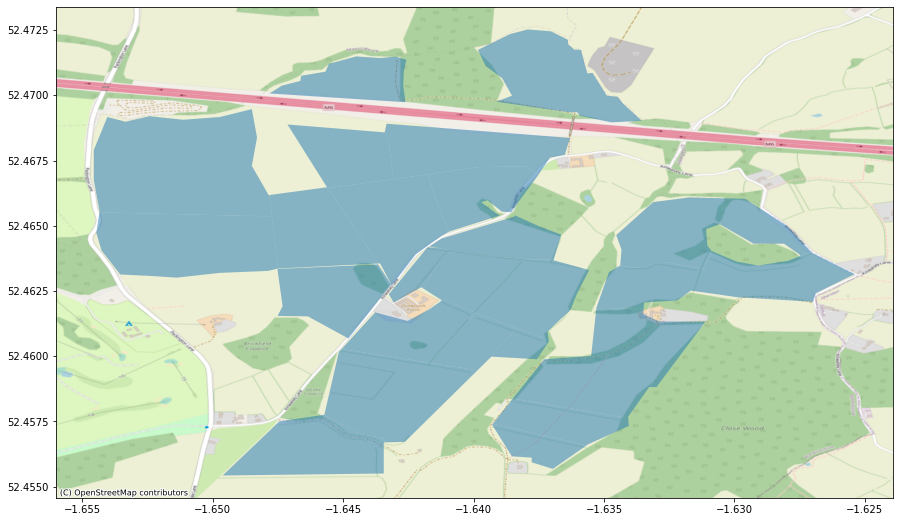

In [20]:
ax = outwoods.to_crs('EPSG:4326').plot(figsize=(15, 10), alpha=0.5)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, crs='EPSG:4326')

In [21]:
outwoods.head().T

0  \
id                                                        1   
Farm                                               Outwoods   
Field                                           Blacksmiths   
area                                                      6   
2017                                            w_wheat_1_f   
2018                                               w_barley   
2019                                                  w_osr   
2020                                            w_wheat_1_f   
2021                                             cover_oats   
2022                                                w_beans   
area_has                                               6.29   
geometry  POLYGON ((-1.647517096357014 52.46334336761506...   

                                                          1  \
id                                                        2   
Farm                                               Outwoods   
Field                                            Near_Field   
area                                                      7   
2017                                               w_osr_cl   
2018                                            w_wheat_1_f   
2019                                               w_barley   
2020                                                sp_oats   
2021                                                 clover   
2022                                            w_wheat_2_f   
area_has                                               7.46   
geometry  POLYGON ((-1.64571866095229 52.45775783923299,...   

                                                          2  \
id                                                        3   
Farm                                               Outwoods   
Field                                                Intake   
area                                                     10   
2017                                               w_osr_cl   
2018                                            w_wheat_1_f   
2019                                               w_barley   
2020                                                sp_oats   
2021                                                 clover   
2022                                            w_wheat_2_f   
area_has                                               9.91   
geometry  POLYGON ((-1.645056301281111 52.46027668930434...   

                                                          3  \
id                                                        4   
Farm                                               Outwoods   
Field                                           Brook_Field   
area                                                      6   
2017                                            w_wheat_1_f   
2018                                               w_barley   
2019                                                sp_oats   
2020                                                sp_oats   
2021                                          diverse_cover   
2022                                           sp_wheat_1_f   
area_has                                               5.83   
geometry  POLYGON ((-1.637119961737725 52.4606156869427,...   

                                                          4  
id                                                        5  
Farm                                               Outwoods  
Field                                           Grain_Store  
area                                                      4  
2017                                               w_barley  
2018                                                 fallow  
2019                                                 fallow  
2020                                                 fallow  
2021                                                environ  
2022                                                   None  
area_has                                                4.0  
geometry  POLYGON ((-1.64106730112

In [22]:
outwoods.replace(['w_wheat_1_f', 'w_wheat_2_f'], 'WHEAT', inplace=True)
outwoods.replace('w_barley', 'BARLEY', inplace=True)
outwoods.replace(['w_osr_cl', 'w_osr'], 'OILSEED', inplace=True)
outwoods.replace(['clover', 'sp_oats', 'cover_oats', 'diverse_cover'], 'GRASS', inplace=True)
outwoods.replace(['fallow', 'environ', 'w_beans'], 'UNKNOWN_CROP', inplace=True)
outwoods.head().T

0  \
id                                                        1   
Farm                                               Outwoods   
Field                                           Blacksmiths   
area                                                      6   
2017                                                  WHEAT   
2018                                                 BARLEY   
2019                                                OILSEED   
2020                                                  WHEAT   
2021                                                  GRASS   
2022                                           UNKNOWN_CROP   
area_has                                               6.29   
geometry  POLYGON ((-1.647517096357014 52.46334336761506...   

                                                          1  \
id                                                        2   
Farm                                               Outwoods   
Field                                            Near_Field   
area                                                      7   
2017                                                OILSEED   
2018                                                  WHEAT   
2019                                                 BARLEY   
2020                                                  GRASS   
2021                                                  GRASS   
2022                                                  WHEAT   
area_has                                               7.46   
geometry  POLYGON ((-1.64571866095229 52.45775783923299,...   

                                                          2  \
id                                                        3   
Farm                                               Outwoods   
Field                                                Intake   
area                                                     10   
2017                                                OILSEED   
2018                                                  WHEAT   
2019                                                 BARLEY   
2020                                                  GRASS   
2021                                                  GRASS   
2022                                                  WHEAT   
area_has                                               9.91   
geometry  POLYGON ((-1.645056301281111 52.46027668930434...   

                                                          3  \
id                                                        4   
Farm                                               Outwoods   
Field                                           Brook_Field   
area                                                      6   
2017                                                  WHEAT   
2018                                                 BARLEY   
2019                                                  GRASS   
2020                                                  GRASS   
2021                                                  GRASS   
2022                                           sp_wheat_1_f   
area_has                                               5.83   
geometry  POLYGON ((-1.637119961737725 52.4606156869427,...   

                                                          4  
id                                                        5  
Farm                                               Outwoods  
Field                                           Grain_Store  
area                                                      4  
2017                                                 BARLEY  
2018                                           UNKNOWN_CROP  
2019                                           UNKNOWN_CROP  
2020                                           UNKNOWN_CROP  
2021                                           UNKNOWN_CROP  
2022                                                   None  
area_has                                                4.0  
geometry  POLYGON ((-1.64106730112

In [23]:
pd.melt(outwoods.loc[:, '2017':'2022'])['value'].value_counts()

WHEAT            33
GRASS            24
BARLEY           19
UNKNOWN_CROP     19
OILSEED          11
sp_beans          3
cover_sp_oats     2
sp_wheat_1_f      2
Name: value, dtype: int64

We still have a few stragglers left over from our emailed data dictionary.
Adopt the mapping of:
* sp_beans -> UNKNOWN (same as w_beans)
* cover_sp_oats -> Grass (same as sp_oats)
* sp_wheat_1_f -> WHEAT

In [24]:
outwoods.replace('sp_beans', 'UNKNOWN_CROP', inplace=True)
outwoods.replace('cover_sp_oats', 'GRASS', inplace=True)
outwoods.replace('sp_wheat_1_f', 'WHEAT', inplace=True)
pd.melt(outwoods.loc[:, '2017':'2022'])['value'].value_counts()

WHEAT           35
GRASS           26
UNKNOWN_CROP    22
BARLEY          19
OILSEED         11
Name: value, dtype: int64

In [25]:
outwoods.Farm.value_counts()

Outwoods    27
Name: Farm, dtype: int64

In [26]:
outwoods.Field.value_counts()

Brook_Field         2
Barn_Field          2
Blacksmiths         1
Wood_Field          1
Daniels             1
12_Acre             1
Rifle_Range         1
15_Acre_MW          1
20_Acre             1
Glebe               1
17_Acre             1
Golf_course         1
Roy_Jordans         1
Leg_Field           1
Bungalow_Field      1
Near_Field          1
Far_Field           1
Drain_Field_2       1
9_Acre_Parsonage    1
Slip                1
13_Acre             1
Drain_Field         1
Grain_Store         1
Intake              1
Over_MW             1
Name: Field, dtype: int64

## Joining ground truth shapefile data with predictions

In [27]:
outwoods.head()

id      Farm        Field  area     2017          2018          2019  \
0   1  Outwoods  Blacksmiths     6    WHEAT        BARLEY       OILSEED   
1   2  Outwoods   Near_Field     7  OILSEED         WHEAT        BARLEY   
2   3  Outwoods       Intake    10  OILSEED         WHEAT        BARLEY   
3   4  Outwoods  Brook_Field     6    WHEAT        BARLEY         GRASS   
4   5  Outwoods  Grain_Store     4   BARLEY  UNKNOWN_CROP  UNKNOWN_CROP   

           2020          2021          2022  area_has  \
0         WHEAT         GRASS  UNKNOWN_CROP      6.29   
1         GRASS         GRASS         WHEAT      7.46   
2         GRASS         GRASS         WHEAT      9.91   
3         GRASS         GRASS         WHEAT      5.83   
4  UNKNOWN_CROP  UNKNOWN_CROP          None      4.00   

                                            geometry  
0  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  
1  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  
2  POLYGON ((-1.64506 52.46028, -1.63985 52.45946...  
3  POLYGON ((-1.63712 52.46062, -1.63990 52.46165...  
4  POLYGON ((-1.64107 52.46400, -1.63787 52.46370...

In [28]:
outwoods.Field.value_counts()

Brook_Field         2
Barn_Field          2
Blacksmiths         1
Wood_Field          1
Daniels             1
12_Acre             1
Rifle_Range         1
15_Acre_MW          1
20_Acre             1
Glebe               1
17_Acre             1
Golf_course         1
Roy_Jordans         1
Leg_Field           1
Bungalow_Field      1
Near_Field          1
Far_Field           1
Drain_Field_2       1
9_Acre_Parsonage    1
Slip                1
13_Acre             1
Drain_Field         1
Grain_Store         1
Intake              1
Over_MW             1
Name: Field, dtype: int64

In [29]:
predictions.field_name.value_counts()

Blacksmiths         5
Golf_course         5
Daniels             5
12_Acre             5
15_Acre_MW          5
20_Acre             5
Glebe               5
17_Acre             5
Roy_Jordans         5
Near_Field          5
Bungalow_Field      5
Leg_Field           5
9_Acre_Parsonage    5
Slip                5
Drain_Field         5
Brook_Field         5
Over_MW             5
Name: field_name, dtype: int64

In [30]:
outwoods_dup = outwoods[outwoods.Field.isin(['Brook_Field', 'Barn_Field'])]
outwoods_dup

id      Farm        Field  area   2017    2018   2019   2020   2021  \
3    4  Outwoods  Brook_Field     6  WHEAT  BARLEY  GRASS  GRASS  GRASS   
10  11  Outwoods   Barn_Field     2   None    None   None   None   None   
11  12  Outwoods   Barn_Field     6   None    None   None   None   None   
14  15  Outwoods  Brook_Field     4  WHEAT  BARLEY  GRASS  GRASS  GRASS   

     2022  area_has                                           geometry  
3   WHEAT      5.83  POLYGON ((-1.63712 52.46062, -1.63990 52.46165...  
10   None      2.34  POLYGON ((-1.63274 52.46133, -1.63349 52.46082...  
11   None      6.36  POLYGON ((-1.63117 52.46335, -1.63266 52.46360...  
14  WHEAT      3.87  POLYGON ((-1.63348 52.46182, -1.63435 52.46183...

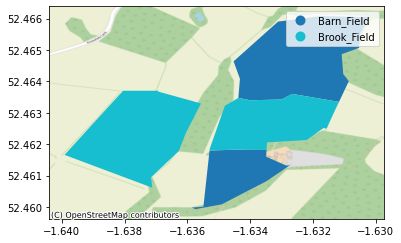

In [31]:
ax = outwoods_dup.plot(column='Field', legend=True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, crs='EPSG:4326')

Would the real Barn Field and Brook Field please stand up...

In [32]:
outwoods = outwoods[~outwoods.Field.isin(['Brook_Field', 'Barn_Field'])]
outwoods.head()

id      Farm        Field  area     2017          2018          2019  \
0   1  Outwoods  Blacksmiths     6    WHEAT        BARLEY       OILSEED   
1   2  Outwoods   Near_Field     7  OILSEED         WHEAT        BARLEY   
2   3  Outwoods       Intake    10  OILSEED         WHEAT        BARLEY   
4   5  Outwoods  Grain_Store     4   BARLEY  UNKNOWN_CROP  UNKNOWN_CROP   
5   6  Outwoods  Drain_Field     1    WHEAT        BARLEY         GRASS   

           2020          2021          2022  area_has  \
0         WHEAT         GRASS  UNKNOWN_CROP      6.29   
1         GRASS         GRASS         WHEAT      7.46   
2         GRASS         GRASS         WHEAT      9.91   
4  UNKNOWN_CROP  UNKNOWN_CROP          None      4.00   
5         GRASS         GRASS         WHEAT      1.19   

                                            geometry  
0  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  
1  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  
2  POLYGON ((-1.64506 52.46028, -1.63985 52.45946...  
4  POLYGON ((-1.64107 52.46400, -1.63787 52.46370...  
5  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...

In [33]:
outwoods.shape

(23, 12)

In [34]:
predictions.head()

agrimetrics_id  \
0   https://data.agrimetrics.co.uk/fields/eKukN2a1...   
1   https://data.agrimetrics.co.uk/fields/CplvWNJD...   
4   https://data.agrimetrics.co.uk/fields/fD4t_pAn...   
7   https://data.agrimetrics.co.uk/fields/W7ErfmVG...   
10  https://data.agrimetrics.co.uk/fields/7C9vsIts...   

             Prediction Date  BARLEY Probability  WHEAT Probability  \
0  2018-06-15 00:00:00+00:00            0.900810           0.040486   
1  2018-06-15 00:00:00+00:00            0.086149           0.791429   
4  2018-06-15 00:00:00+00:00            0.900810           0.040486   
7  2018-06-15 00:00:00+00:00            0.900810           0.040486   
10 2018-06-15 00:00:00+00:00            0.067203           0.064337   

    UNKNOWN_CROP Probability  OILSEED Probability  GRASS Probability  \
0                   0.033592             0.013500           0.011613   
1                   0.060712             0.011207           0.050503   
4                   0.033592             0.013500           0.011613   
7                   0.033592             0.013500           0.011613   
10                  0.505652             0.028382           0.334426   

     field_name  
0   Blacksmiths  
1    Near_Field  
4   Brook_Field  
7   Drain_Field  
10         Slip

In [35]:
crop_cols = {0: 'BARLEY', 1: 'WHEAT', 2: 'UNKNOWN_CROP', 3: 'OILSEED', 4: 'GRASS'}
probabilities = predictions.loc[:, 'BARLEY Probability':'GRASS Probability']
max_col = np.argmax(probabilities.values, axis=1)
predictions['Predicted'] = max_col
predictions.Predicted.replace(crop_cols, inplace=True)

In [36]:
predictions.head()

agrimetrics_id  \
0   https://data.agrimetrics.co.uk/fields/eKukN2a1...   
1   https://data.agrimetrics.co.uk/fields/CplvWNJD...   
4   https://data.agrimetrics.co.uk/fields/fD4t_pAn...   
7   https://data.agrimetrics.co.uk/fields/W7ErfmVG...   
10  https://data.agrimetrics.co.uk/fields/7C9vsIts...   

             Prediction Date  BARLEY Probability  WHEAT Probability  \
0  2018-06-15 00:00:00+00:00            0.900810           0.040486   
1  2018-06-15 00:00:00+00:00            0.086149           0.791429   
4  2018-06-15 00:00:00+00:00            0.900810           0.040486   
7  2018-06-15 00:00:00+00:00            0.900810           0.040486   
10 2018-06-15 00:00:00+00:00            0.067203           0.064337   

    UNKNOWN_CROP Probability  OILSEED Probability  GRASS Probability  \
0                   0.033592             0.013500           0.011613   
1                   0.060712             0.011207           0.050503   
4                   0.033592             0.013500           0.011613   
7                   0.033592             0.013500           0.011613   
10                  0.505652             0.028382           0.334426   

     field_name     Predicted  
0   Blacksmiths        BARLEY  
1    Near_Field         WHEAT  
4   Brook_Field        BARLEY  
7   Drain_Field        BARLEY  
10         Slip  UNKNOWN_CROP

In [37]:
predicted_crops = predictions[['Prediction Date', 'field_name', 'Predicted']]
predicted_crops['year'] = predicted_crops['Prediction Date'].apply(lambda x: x.year)
predicted_crops.drop(columns=['Prediction Date'], inplace=True)
predicted_crops.head()

/tmp/ipykernel_21407/1044576712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_crops['year'] = predicted_crops['Prediction Date'].apply(lambda x: x.year)
/tmp/ipykernel_21407/1044576712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_crops.drop(columns=['Prediction Date'], inplace=True)


field_name     Predicted  year
0   Blacksmiths        BARLEY  2018
1    Near_Field         WHEAT  2018
4   Brook_Field        BARLEY  2018
7   Drain_Field        BARLEY  2018
10         Slip  UNKNOWN_CROP  2018

In [38]:
predicted_crops[predicted_crops.year == 2018]

field_name     Predicted  year
0        Blacksmiths        BARLEY  2018
1         Near_Field         WHEAT  2018
4        Brook_Field        BARLEY  2018
7        Drain_Field        BARLEY  2018
10              Slip  UNKNOWN_CROP  2018
11  9_Acre_Parsonage        BARLEY  2018
16         Leg_Field  UNKNOWN_CROP  2018
17    Bungalow_Field  UNKNOWN_CROP  2018
20       Roy_Jordans  UNKNOWN_CROP  2018
21       Golf_course       OILSEED  2018
22           17_Acre        BARLEY  2018
23             Glebe       OILSEED  2018
24           20_Acre  UNKNOWN_CROP  2018
25        15_Acre_MW  UNKNOWN_CROP  2018
28           12_Acre        BARLEY  2018
29           Daniels         WHEAT  2018
30           Over_MW         WHEAT  2018

In [39]:
predictions['Prediction Date'][0].year

2018

In [40]:
outwoods.head()

id      Farm        Field  area     2017          2018          2019  \
0   1  Outwoods  Blacksmiths     6    WHEAT        BARLEY       OILSEED   
1   2  Outwoods   Near_Field     7  OILSEED         WHEAT        BARLEY   
2   3  Outwoods       Intake    10  OILSEED         WHEAT        BARLEY   
4   5  Outwoods  Grain_Store     4   BARLEY  UNKNOWN_CROP  UNKNOWN_CROP   
5   6  Outwoods  Drain_Field     1    WHEAT        BARLEY         GRASS   

           2020          2021          2022  area_has  \
0         WHEAT         GRASS  UNKNOWN_CROP      6.29   
1         GRASS         GRASS         WHEAT      7.46   
2         GRASS         GRASS         WHEAT      9.91   
4  UNKNOWN_CROP  UNKNOWN_CROP          None      4.00   
5         GRASS         GRASS         WHEAT      1.19   

                                            geometry  
0  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  
1  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  
2  POLYGON ((-1.64506 52.46028, -1.63985 52.45946...  
4  POLYGON ((-1.64107 52.46400, -1.63787 52.46370...  
5  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...

In [41]:
outwoods_long = pd.melt(outwoods, id_vars=['Field', 'geometry'], value_vars=['2017', '2018', '2019', '2020', '2021', '2022'], var_name='year', value_name='Actual crop')
outwoods_long.year = outwoods_long.year.astype('int64')
outwoods_long

Field                                           geometry  year  \
0    Blacksmiths  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  2017   
1     Near_Field  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  2017   
2         Intake  POLYGON ((-1.64506 52.46028, -1.63985 52.45946...  2017   
3    Grain_Store  POLYGON ((-1.64107 52.46400, -1.63787 52.46370...  2017   
4    Drain_Field  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...  2017   
..           ...                                                ...   ...   
133   15_Acre_MW  POLYGON ((-1.64341 52.46858, -1.64326 52.46828...  2022   
134  Rifle_Range  POLYGON ((-1.64308 52.46678, -1.64326 52.46828...  2022   
135      12_Acre  POLYGON ((-1.64094 52.46477, -1.64142 52.46593...  2022   
136      Daniels  POLYGON ((-1.64782 52.47007, -1.64734 52.47037...  2022   
137      Over_MW  POLYGON ((-1.63983 52.47174, -1.63859 52.47235...  2022   

      Actual crop  
0           WHEAT  
1         OILSEED  
2         OILSEED  
3          BARLEY  
4           WHEAT  
..            ...  
133  UNKNOWN_CROP  
134  UNKNOWN_CROP  
135  UNKNOWN_CROP  
136        BARLEY  
137        BARLEY  

[138 rows x 4 columns]

In [42]:
predicted_crops

field_name     Predicted  year
0    Blacksmiths        BARLEY  2018
1     Near_Field         WHEAT  2018
4    Brook_Field        BARLEY  2018
7    Drain_Field        BARLEY  2018
10          Slip  UNKNOWN_CROP  2018
..           ...           ...   ...
148      20_Acre         GRASS  2022
149   15_Acre_MW  UNKNOWN_CROP  2022
152      12_Acre         GRASS  2022
153      Daniels         GRASS  2022
154      Over_MW         GRASS  2022

[85 rows x 3 columns]

In [43]:
combined = outwoods_long.merge(predicted_crops, left_on=['Field', 'year'], right_on=['field_name', 'year'])
combined

Field                                           geometry  year  \
0        Blacksmiths  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  2018   
1         Near_Field  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  2018   
2        Drain_Field  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...  2018   
3               Slip  POLYGON ((-1.64145 52.46416, -1.64101 52.46408...  2018   
4   9_Acre_Parsonage  POLYGON ((-1.63842 52.46540, -1.63747 52.46497...  2018   
..               ...                                                ...   ...   
75           20_Acre  POLYGON ((-1.64175 52.46697, -1.64142 52.46593...  2022   
76        15_Acre_MW  POLYGON ((-1.64341 52.46858, -1.64326 52.46828...  2022   
77           12_Acre  POLYGON ((-1.64094 52.46477, -1.64142 52.46593...  2022   
78           Daniels  POLYGON ((-1.64782 52.47007, -1.64734 52.47037...  2022   
79           Over_MW  POLYGON ((-1.63983 52.47174, -1.63859 52.47235...  2022   

     Actual crop        field_name     Predicted  
0         BARLEY       Blacksmiths        BARLEY  
1          WHEAT        Near_Field         WHEAT  
2         BARLEY       Drain_Field        BARLEY  
3   UNKNOWN_CROP              Slip  UNKNOWN_CROP  
4         BARLEY  9_Acre_Parsonage        BARLEY  
..           ...               ...           ...  
75  UNKNOWN_CROP           20_Acre         GRASS  
76  UNKNOWN_CROP        15_Acre_MW  UNKNOWN_CROP  
77  UNKNOWN_CROP           12_Acre         GRASS  
78        BARLEY           Daniels         GRASS  
79        BARLEY           Over_MW         GRASS  

[80 rows x 6 columns]

In [44]:
combined['Correct'] = combined['Actual crop'] == combined.Predicted
combined

Field                                           geometry  year  \
0        Blacksmiths  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  2018   
1         Near_Field  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  2018   
2        Drain_Field  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...  2018   
3               Slip  POLYGON ((-1.64145 52.46416, -1.64101 52.46408...  2018   
4   9_Acre_Parsonage  POLYGON ((-1.63842 52.46540, -1.63747 52.46497...  2018   
..               ...                                                ...   ...   
75           20_Acre  POLYGON ((-1.64175 52.46697, -1.64142 52.46593...  2022   
76        15_Acre_MW  POLYGON ((-1.64341 52.46858, -1.64326 52.46828...  2022   
77           12_Acre  POLYGON ((-1.64094 52.46477, -1.64142 52.46593...  2022   
78           Daniels  POLYGON ((-1.64782 52.47007, -1.64734 52.47037...  2022   
79           Over_MW  POLYGON ((-1.63983 52.47174, -1.63859 52.47235...  2022   

     Actual crop        field_name     Predicted  Correct  
0         BARLEY       Blacksmiths        BARLEY     True  
1          WHEAT        Near_Field         WHEAT     True  
2         BARLEY       Drain_Field        BARLEY     True  
3   UNKNOWN_CROP              Slip  UNKNOWN_CROP     True  
4         BARLEY  9_Acre_Parsonage        BARLEY     True  
..           ...               ...           ...      ...  
75  UNKNOWN_CROP           20_Acre         GRASS    False  
76  UNKNOWN_CROP        15_Acre_MW  UNKNOWN_CROP     True  
77  UNKNOWN_CROP           12_Acre         GRASS    False  
78        BARLEY           Daniels         GRASS    False  
79        BARLEY           Over_MW         GRASS    False  

[80 rows x 7 columns]

In [45]:
combined[combined.year == 2018]

Field                                           geometry  year  \
0        Blacksmiths  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  2018   
1         Near_Field  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  2018   
2        Drain_Field  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...  2018   
3               Slip  POLYGON ((-1.64145 52.46416, -1.64101 52.46408...  2018   
4   9_Acre_Parsonage  POLYGON ((-1.63842 52.46540, -1.63747 52.46497...  2018   
5          Leg_Field  POLYGON ((-1.62747 52.46384, -1.62752 52.46391...  2018   
6     Bungalow_Field  POLYGON ((-1.63567 52.45658, -1.63926 52.45741...  2018   
7        Roy_Jordans  POLYGON ((-1.63926 52.45741, -1.63567 52.45658...  2018   
8        Golf_course  POLYGON ((-1.65434 52.46551, -1.64773 52.46536...  2018   
9            17_Acre  POLYGON ((-1.64568 52.46647, -1.64566 52.46647...  2018   
10             Glebe  POLYGON ((-1.64773 52.46536, -1.65434 52.46551...  2018   
11           20_Acre  POLYGON ((-1.64175 52.46697, -1.64142 52.46593...  2018   
12        15_Acre_MW  POLYGON ((-1.64341 52.46858, -1.64326 52.46828...  2018   
13           12_Acre  POLYGON ((-1.64094 52.46477, -1.64142 52.46593...  2018   
14           Daniels  POLYGON ((-1.64782 52.47007, -1.64734 52.47037...  2018   
15           Over_MW  POLYGON ((-1.63983 52.47174, -1.63859 52.47235...  2018   

     Actual crop        field_name     Predicted  Correct  
0         BARLEY       Blacksmiths        BARLEY     True  
1          WHEAT        Near_Field         WHEAT     True  
2         BARLEY       Drain_Field        BARLEY     True  
3   UNKNOWN_CROP              Slip  UNKNOWN_CROP     True  
4         BARLEY  9_Acre_Parsonage        BARLEY     True  
5           None         Leg_Field  UNKNOWN_CROP    False  
6           None    Bungalow_Field  UNKNOWN_CROP    False  
7           None       Roy_Jordans  UNKNOWN_CROP    False  
8        OILSEED       Golf_course       OILSEED     True  
9         BARLEY           17_Acre        BARLEY     True  
10       OILSEED             Glebe       OILSEED     True  
11  UNKNOWN_CROP           20_Acre  UNKNOWN_CROP     True  
12  UNKNOWN_CROP        15_Acre_MW  UNKNOWN_CROP     True  
13        BARLEY           12_Acre        BARLEY     True  
14         WHEAT           Daniels         WHEAT     True  
15         WHEAT           Over_MW         WHEAT     True

In [46]:
combined[combined.year == 2022]

Field                                           geometry  year  \
64       Blacksmiths  POLYGON ((-1.64752 52.46334, -1.64366 52.46352...  2022   
65        Near_Field  POLYGON ((-1.64572 52.45776, -1.64496 52.45733...  2022   
66       Drain_Field  POLYGON ((-1.63927 52.45998, -1.63921 52.46014...  2022   
67              Slip  POLYGON ((-1.64145 52.46416, -1.64101 52.46408...  2022   
68  9_Acre_Parsonage  POLYGON ((-1.63842 52.46540, -1.63747 52.46497...  2022   
69         Leg_Field  POLYGON ((-1.62747 52.46384, -1.62752 52.46391...  2022   
70    Bungalow_Field  POLYGON ((-1.63567 52.45658, -1.63926 52.45741...  2022   
71       Roy_Jordans  POLYGON ((-1.63926 52.45741, -1.63567 52.45658...  2022   
72       Golf_course  POLYGON ((-1.65434 52.46551, -1.64773 52.46536...  2022   
73           17_Acre  POLYGON ((-1.64568 52.46647, -1.64566 52.46647...  2022   
74             Glebe  POLYGON ((-1.64773 52.46536, -1.65434 52.46551...  2022   
75           20_Acre  POLYGON ((-1.64175 52.46697, -1.64142 52.46593...  2022   
76        15_Acre_MW  POLYGON ((-1.64341 52.46858, -1.64326 52.46828...  2022   
77           12_Acre  POLYGON ((-1.64094 52.46477, -1.64142 52.46593...  2022   
78           Daniels  POLYGON ((-1.64782 52.47007, -1.64734 52.47037...  2022   
79           Over_MW  POLYGON ((-1.63983 52.47174, -1.63859 52.47235...  2022   

     Actual crop        field_name     Predicted  Correct  
64  UNKNOWN_CROP       Blacksmiths  UNKNOWN_CROP     True  
65         WHEAT        Near_Field         GRASS    False  
66         WHEAT       Drain_Field         GRASS    False  
67  UNKNOWN_CROP              Slip         GRASS    False  
68         WHEAT  9_Acre_Parsonage         GRASS    False  
69          None         Leg_Field         GRASS    False  
70          None    Bungalow_Field         GRASS    False  
71          None       Roy_Jordans         GRASS    False  
72         WHEAT       Golf_course         GRASS    False  
73  UNKNOWN_CROP           17_Acre         GRASS    False  
74         WHEAT             Glebe         GRASS    False  
75  UNKNOWN_CROP           20_Acre         GRASS    False  
76  UNKNOWN_CROP        15_Acre_MW  UNKNOWN_CROP     True  
77  UNKNOWN_CROP           12_Acre         GRASS    False  
78        BARLEY           Daniels         GRASS    False  
79        BARLEY           Over_MW         GRASS    False

In [48]:
combined.groupby(['year'])['Correct'].mean()

year
2018    0.8125
2019    0.5625
2020    0.3125
2021    0.0625
2022    0.1250
Name: Correct, dtype: float64

Very preliminary, quick result, but does jibe with earlier plot showing strong model confidence that rapidly waned before possibly picking up again (but not convincingly).